#**Victims of armed conflict**

###Names of the members:

*  Sofia Gomez Rodriguez - 2242086
*  Victor Andres Martinez Preciado - 2240805
*  Juan Esteban Paredes Alvarez - 2240567
*  Sofia Reyes Molina - 2240094
*  Salome Rivas Marulanda -2242055



# **General Description of the Dataset:**

The dataset contains information about victims of the armed conflict reported in Cali, recorded from June 5, 2012, to November 30, 2023.


## **Description of the Columns:**
**code_sspm :** Sequential numbering of each row.

**date_processing:** Date on which the form or document was completed.

**code_municipality:** Postal code of the municipality.

**municipality:** Name of the municipality where the victimizing event was reported.

**sex:** The gender under which the person is registered on their identification document (male or female).

**ethnic_group:** This column indicates the ethnic group to which the victim belongs, such as Indigenous, Afro-Colombian, Mestizo, etc.

**victimization_fact:**  Refers to violations of International Humanitarian Law (IHL) and Human Rights (HR) that occurred within the framework of Article 3 of Law 1448.

**web_report_date:** Date on which the report was submitted through the web platform.

**departament:**  This column represents the geographic location where the victims of the armed conflict are recorded. In this dataset, it only includes the department of Valle del Cauca.

**date_of_birth:** This column shows the victim's date of birth, including day, month, and year.

**years_in_the_visitia:** This column indicates the age of the person at the time they were registered as a victim of the armed conflict.

**commune:** This column represents the district (comuna) where the victim lived and where the armed conflict event occurred.

**cut-off_date:** Refers to the last date on which each record was updated; it represents the cutoff date up to which the data was collected.

# **Extraction Phase**

##Link to where the dataset was taken from

https://datos.cali.gov.co/tl/dataset/poblacion-victima-del-conflicto-armado/resource/2751d517-53f9-4abb-9046-e69af95676d3

In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
#Conect with github to load the data
!git clone https://github.com/vamphook972/armed-conflict-ETL-project.git
%cd armed-conflict-ETL-project/

fatal: destination path 'armed-conflict-ETL-project' already exists and is not an empty directory.
/content/armed-conflict-ETL-project


In [3]:
# dataset path

df_victims1 = pd.read_csv('./data/raw/data-population-victims-of-armed-conflict.csv',encoding='latin-1',header=None,sep=';')

/tmp/ipython-input-1597042671.py:3: DtypeWarning: Columns (0,2,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_victims1 = pd.read_csv('./data/raw/data-population-victims-of-armed-conflict.csv',encoding='latin-1',header=None,sep=';')


#Exploration and cleanup phase

In [4]:
#To see the names of the columns
df_victims1.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,codigo_sspm,FechaDiligenciamiento,CodMunicipio,Municipio,Departamento,sexo,Grupo étnico,fechadenacimiento,Edad años en la visita,Comuna,HechoVictimizante,fechadecorte,fechareporteweb
1,1,05-jun-2012,76001,Cali,Valle del Cauca,Masculino,Mestizo,16-jun-1964,47,8,Desplazamiento forzado,30-nov-2023,4-dic-2023


In [5]:
#to see the size of the df
df_victims1.shape

(72128, 13)

In [6]:
# We used . info() to extract important information from the dataset
df_victims1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72128 entries, 0 to 72127
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       71151 non-null  object
 1   1       71151 non-null  object
 2   2       71151 non-null  object
 3   3       71151 non-null  object
 4   4       71151 non-null  object
 5   5       71151 non-null  object
 6   6       71151 non-null  object
 7   7       71151 non-null  object
 8   8       71151 non-null  object
 9   9       71144 non-null  object
 10  10      64794 non-null  object
 11  11      71151 non-null  object
 12  12      71151 non-null  object
dtypes: object(13)
memory usage: 7.2+ MB


In [7]:
# The headings did not correspond to their meaning (consecutive numbers) so we decided to change and normalize column names
#Using snake case
headers = ["code_sspm","date_processing","code_municipality","municipality","departament", "sex","ethnic_group",
         "date_of_birth","years_in_the_visitia","commune", "victimization_fact","cut-off_date","web_report_date"]

df_victims1.columns = headers

In [8]:
# delete repeated columns and reset the index
df = df_victims1.drop([0]).reset_index(drop=True)

In [9]:
df.head()

,code_sspm,date_processing,code_municipality,municipality,departament,sex,ethnic_group,date_of_birth,years_in_the_visitia,commune,victimization_fact,cut-off_date,web_report_date
0,1,05-jun-2012,76001,Cali,Valle del Cauca,Masculino,Mestizo,16-jun-1964,47,8,Desplazamiento forzado,30-nov-2023,4-dic-2023
1,2,05-jun-2012,76001,Cali,Valle del Cauca,Femenino,Mestizo,27-oct-1970,41,8,Desplazamiento forzado,30-nov-2023,4-dic-2023
2,3,05-jun-2012,76001,Cali,Valle del Cauca,Masculino,Mestizo,04-oct-1996,15,8,Desplazamiento forzado,30-nov-2023,4-dic-2023
3,4,05-jun-2012,76001,Cali,Valle del Cauca,Femenino,Mestizo,12-jun-2007,4,8,Desplazamiento forzado,30-nov-2023,4-dic-2023
4,5,25-jun-2012,76001,Cali,Valle del Cauca,Femenino,Afrodescendiente,20-may-1970,42,8,Desplazamiento forzado,30-nov-2023,4-dic-2023


In [10]:
#With .describe() we get important metrics like(count,unique,top,freq)
df_victims1.describe()

,code_sspm,date_processing,code_municipality,municipality,departament,sex,ethnic_group,date_of_birth,years_in_the_visitia,commune,victimization_fact,cut-off_date,web_report_date
count,71151.0,71151,71151,71151,71151,71151,71151,71151,71151,71144,64794,71151,71151
unique,71151.0,2593,3,2,2,3,11,23691,211,70,13,2,2
top,71150.0,16-nov-2018,76001,Cali,Valle del Cauca,Femenino,Mestizo,31-dic-1938,10,15,Desplazamiento forzado,30-nov-2023,4-dic-2023
freq,1.0,403,65535,71150,71150,41080,24680,23,1775,12815,60499,71150,71150


# Duplicate record analysis

In [11]:
# See duplicates
df.duplicated().sum()

np.int64(976)

In [12]:
#to check for duplicate IDs
df['code_sspm'].duplicated().sum()

np.int64(976)

In [13]:
# Identify nulls in the df
df.isna().sum()

,0
code_sspm,977
date_processing,977
code_municipality,977
municipality,977
departament,977
sex,977
ethnic_group,977
date_of_birth,977
years_in_the_visitia,977
commune,984


In [14]:
#check whether the last values correspond to null values
df.tail(978)

,code_sspm,date_processing,code_municipality,municipality,departament,sex,ethnic_group,date_of_birth,years_in_the_visitia,commune,victimization_fact,cut-off_date,web_report_date
71149,71150.0,16-nov-2023,76001.0,Cali,Valle del Cauca,Femenino,Afrocolombiano,10-ago-2009,14.0,21.0,Desplazamiento forzado,30-nov-2023,4-dic-2023
71150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#We noticed that there are some records that are completely null, so those 977 completely null records are deleted
df = df.dropna(how="all")

In [16]:
#To see the percentage of nulls in each column (victimization_fact and commune)
percentage_nulls_fact = (((df["victimization_fact"].isna().sum())/df.shape[0])*100 )
print(f'The percentage of null values in the victimization_fact column is: {percentage_nulls_fact : .2f}%')

percentage_nulls_commune = (((df["commune"].isna().sum())/df.shape[0])*100 )
print(f'The percentage of null values in the commune column is: {percentage_nulls_commune : .4f}%')

The percentage of null values in the victimization_fact column is:  8.93%
The percentage of null values in the commune column is:  0.0098%


In [17]:
#fill in blanks in victimization_fact and commune
df['victimization_fact'] = (df['victimization_fact']).fillna('No Registra')
df['commune'] = (df['commune']).fillna('No Registra')

In [18]:
# See datatype of every column
df.dtypes

,0
code_sspm,object
date_processing,object
code_municipality,object
municipality,object
departament,object
sex,object
ethnic_group,object
date_of_birth,object
years_in_the_visitia,object
commune,object


In [19]:
#to work with different age
age = df['years_in_the_visitia']

In [20]:
df['years_in_the_visitia'].unique()

array(['47', '41', '15', '4', '42', '27', '0', '81', '59', '16', '22',
       '3', '40', '17', '14', '34', '8', '35', '6', '57', '28', '25',
       '66', '87', '48', '10', '71', '36', '39', '19', '13', '5', '37',
       '11', '9', '77', '51', '55', '29', '49', '18', '56', '20', '12',
       '76', '33', '50', '21', '7', '31', '2', '67', '64', '44', '-8',
       '73', '30', '52', '1', '45', '38', '-1', '75', '46', '43', '24',
       '61', '32', '23', '62', '26', '68', '60', '79', '82', '89', '74',
       '80', '54', '63', '85', '65', '53', '72', '70', '86', '69', '58',
       '84', '88', '91', '-4', '100', '98', '78', '-6', '-3', '83', '93',
       '90', '-2', '94', '92', '95', '96', '-5', '-9', '116', '99', '102',
       '115', '-12', '105', '97', '-90', 16.0, 11.0, 10.0, 67.0, 52.0,
       42.0, 22.0, 18.0, 40.0, 32.0, 5.0, 49.0, 9.0, 36.0, 29.0, 2.0,
       56.0, 59.0, 54.0, 23.0, 53.0, 34.0, 63.0, 73.0, 17.0, 12.0, 6.0,
       19.0, 7.0, 44.0, 37.0, 8.0, 14.0, 24.0, 61.0, 15.0, 33.0,

# Observation of values within the dataset columns

In [21]:
#to view the values in commune column
df["commune"].unique()

array(['8', '12', '11', '15', '9', '10', '13', '19', '3', '21', '14',
       '16', '7', '20', '1', '4', '6', '17', '2', '5', '18', '54', '0',
       '51', 'No Registra', '61', '53', '64', '62', '55', '52', '59',
       '57', '63', '60', '58', '65', '56', '22', 4.0, 6.0, 18.0, 7.0,
       15.0, 11.0, 14.0, 21.0, 20.0, 16.0, 10.0, 1.0, 17.0, 2.0, 13.0,
       5.0, 19.0, 8.0, 9.0, 12.0, 65.0, 63.0, 3.0, 54.0, 64.0, 0.0, 55.0,
       52.0, 56.0, 22.0, 53.0], dtype=object)

In [22]:
#to view the values in commune column
df["victimization_fact"].unique()

array(['Desplazamiento forzado', 'No Registra', 'Homicidio', 'Amenaza',
       'Desaparicion forzada', 'Eventos masivos',
       'Acto terrorista/Atentados/Combates/Enfrentamientos/Hostigamientos',
       'Perdida de Bienes Muebles o Inmuebles', 'Secuestro',
       'Abandono o Despojo Forzado de Tierras',
       'Lesiones personales y psicologicas que produzcan o no incapacidad permanente',
       'Vinculacion de Niños Niñas y Adolescentes a Actividades Relacionadas con grupos armados',
       'Delitos contra la libertad y la integridad sexual en desarrollo del conflicto armado'],
      dtype=object)

In [23]:
#to view the values in years_in_the_visitia column
df["years_in_the_visitia"].unique()

array(['47', '41', '15', '4', '42', '27', '0', '81', '59', '16', '22',
       '3', '40', '17', '14', '34', '8', '35', '6', '57', '28', '25',
       '66', '87', '48', '10', '71', '36', '39', '19', '13', '5', '37',
       '11', '9', '77', '51', '55', '29', '49', '18', '56', '20', '12',
       '76', '33', '50', '21', '7', '31', '2', '67', '64', '44', '-8',
       '73', '30', '52', '1', '45', '38', '-1', '75', '46', '43', '24',
       '61', '32', '23', '62', '26', '68', '60', '79', '82', '89', '74',
       '80', '54', '63', '85', '65', '53', '72', '70', '86', '69', '58',
       '84', '88', '91', '-4', '100', '98', '78', '-6', '-3', '83', '93',
       '90', '-2', '94', '92', '95', '96', '-5', '-9', '116', '99', '102',
       '115', '-12', '105', '97', '-90', 16.0, 11.0, 10.0, 67.0, 52.0,
       42.0, 22.0, 18.0, 40.0, 32.0, 5.0, 49.0, 9.0, 36.0, 29.0, 2.0,
       56.0, 59.0, 54.0, 23.0, 53.0, 34.0, 63.0, 73.0, 17.0, 12.0, 6.0,
       19.0, 7.0, 44.0, 37.0, 8.0, 14.0, 24.0, 61.0, 15.0, 33.0,

In [24]:
#to view the values in ethnic_group column
df['ethnic_group'].unique()

array(['Mestizo', 'Afrodescendiente', 'Negro', 'Indígena',
       'Afrocolombiano', 'Otro', 'Moreno', 'Rom', 'Palenquero', 'Raizal'],
      dtype=object)

In [25]:
##to view the values in sex column
df['sex'].unique()

array(['Masculino', 'Femenino'], dtype=object)

In [26]:
#to view the values in departament column
df['departament'].unique()

array(['Valle del Cauca'], dtype=object)

In [27]:
#to view the values in municipality column
df['municipality'].unique()

array(['Cali'], dtype=object)

# **Transformation**

# Data type conversion and column normalization

In [28]:
#Convert columns to integer(years_in_the_visitia,code_sspm, code_municipality )
df['years_in_the_visitia'] = (df['years_in_the_visitia']).astype(int)
df['code_sspm'] = (df['code_sspm']).astype(int)
df['code_municipality'] = (df['code_municipality']).astype(int)

In [29]:
# date normalization, with the object of convert the columns to datetime
df['web_report_date'] = df['web_report_date'].str.replace('dic', 'dec')
df['date_of_birth'] = df['date_of_birth'].str.replace('ene', 'jan')
df['date_of_birth'] = df['date_of_birth'].str.replace('ago', 'aug')
df['date_of_birth'] = df['date_of_birth'].str.replace('dic', 'dec')
df['date_of_birth'] = df['date_of_birth'].str.replace('abr', 'apr')
df['date_processing'] = df['date_processing'].str.replace('ene', 'jan')
df['date_processing'] = df['date_processing'].str.replace('ago', 'aug')
df['date_processing'] = df['date_processing'].str.replace('dic', 'dec')
df['date_processing'] = df['date_processing'].str.replace('abr', 'apr')

In [30]:
#convert dates to datetime
df['web_report_date'] = pd.to_datetime(df['web_report_date'])
df['cut-off_date'] = pd.to_datetime(df['cut-off_date'])
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['date_processing'] = pd.to_datetime(df['date_processing'])

/tmp/ipython-input-3021725615.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
/tmp/ipython-input-3021725615.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_processing'] = pd.to_datetime(df['date_processing'])


In [31]:
df.dtypes

,0
code_sspm,int64
date_processing,datetime64[ns]
code_municipality,int64
municipality,object
departament,object
sex,object
ethnic_group,object
date_of_birth,datetime64[ns]
years_in_the_visitia,int64
commune,object


In [32]:
#to see ages over 100 (visualize atypical values in age)
for age in df['years_in_the_visitia']:
  if age >= 100:
    print(f'Exist {age}   ')

Exist 100   
Exist 116   
Exist 102   
Exist 115   
Exist 105   
Exist 100   
Exist 102   
Exist 102   
Exist 100   


In [33]:
#to view the values in web_report_date column
df['web_report_date'].unique()

<DatetimeArray>
['2023-12-04 00:00:00']
Length: 1, dtype: datetime64[ns]

In [34]:
#to view the values in cut-off_date column
df['cut-off_date'].unique()

<DatetimeArray>
['2023-11-30 00:00:00']
Length: 1, dtype: datetime64[ns]

In [35]:
#normalize values in victimization_fact (Ninos and Ninas are equal to Niños and Niñas)
df['victimization_fact'] = df['victimization_fact'].replace(
    'Vinculacion de NiÃ±os NiÃ±as y Adolescentes a Actividades Relacionadas con grupos armados',
    'Vinculacion de Ninos Ninas y Adolescentes a Actividades Relacionadas con grupos armados'
)

In [36]:
#normalize values in ethnic_group
df['ethnic_group'] = df['ethnic_group'].replace(
    'IndÃ\xadgena',
    'Indigena'
)

##Bar chart of the five most frequent victimizing events

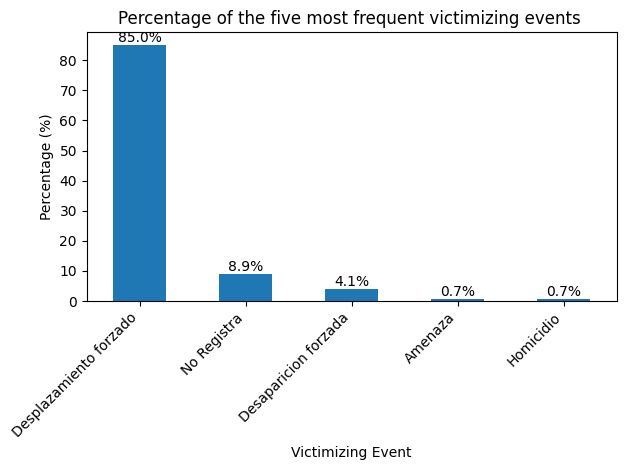

In [37]:
# Graph showing the five most frequent victimizing events in the dataset
# Count victimizing events and calculate percentages
counts = df['victimization_fact'].value_counts()
percentages = (counts / counts.sum()) * 100

# Select top 5
top_percentages = percentages.head(5)

# Bar chart
plt.figure()
top_percentages.plot(kind='bar')
plt.title('Percentage of the five most frequent victimizing events ')
plt.xlabel('Victimizing Event')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')

# Show percentage values on bars
for i, v in enumerate(top_percentages):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [38]:
#Function to normalize the column
def normalize_commune(value):
  """
  Phase: Transform

  Description: Apply a normalization to the original dataset
  so that all records are in a single format (no decimals).

  Parameters:

value: a single value from the 'commune' column. It can be numeric(int or float) or non-numeric (string).

    Output:

Returns a string with the normalized community value
    without decimals"""
  try:# convert to float first
      num = float(value)# Convert to integer and then to string without decimals
      return str(int(num))
  except:# If it is not numerical, leave it as is.
      return str(value).strip()

#Apply the function
df["commune"] = df["commune"].apply(normalize_commune)

In [39]:
print(normalize_commune.__doc__)


  Phase: Transform

  Description: Apply a normalization to the original dataset
  so that all records are in a single format (no decimals).

  Parameters:

value: a single value from the 'commune' column. It can be numeric(int or float) or non-numeric (string).

    Output:

Returns a string with the normalized community value
    without decimals


##Transformation of the ‘commune’ column

In [40]:
#to leave only the valid communes in the city of Cali (1-22)
df["commune"] = pd.to_numeric(df["commune"], errors="coerce")

df.loc[
    (df["commune"] < 1) | (df["commune"] > 22),
    "commune"
] = np.nan

df["commune"] = df["commune"].astype("Int64")

# Now convert NA to “Not Registered”
df["commune"] = df["commune"].astype("string").fillna("No Registra")

In [41]:
# Count how many records are exactly "No Registra" and divide by the total
total_rows = len(df)
no_registered_count = (df['commune'] == "No Registra").sum()
no_registered_percentage = (no_registered_count / total_rows) * 100

no_registered_count_fact = (df['victimization_fact'] == "No Registra").sum()
no_registered_percentage_fact = (no_registered_count_fact / total_rows) * 100

print(f"The percentage of 'No Registra' in victimization_fact is: {no_registered_percentage_fact:.2f}%")
print(f"The percentage of 'No Registra' in commune is: {no_registered_percentage:.2f}%")

The percentage of 'No Registra' in victimization_fact is: 8.93%
The percentage of 'No Registra' in commune is: 2.23%


In [42]:
#to see the most common victimizing fact by commune
mode_per_commune = (
    df
    .groupby("commune")["victimization_fact"]
    .agg(lambda x: x.value_counts().idxmax())
)

print(mode_per_commune)

commune
1              Desplazamiento forzado
10             Desplazamiento forzado
11             Desplazamiento forzado
12             Desplazamiento forzado
13             Desplazamiento forzado
14             Desplazamiento forzado
15             Desplazamiento forzado
16             Desplazamiento forzado
17             Desplazamiento forzado
18             Desplazamiento forzado
19             Desplazamiento forzado
2              Desplazamiento forzado
20             Desplazamiento forzado
21             Desplazamiento forzado
22             Desplazamiento forzado
3              Desplazamiento forzado
4              Desplazamiento forzado
5              Desplazamiento forzado
6              Desplazamiento forzado
7              Desplazamiento forzado
8              Desplazamiento forzado
9              Desplazamiento forzado
No Registra    Desplazamiento forzado
Name: victimization_fact, dtype: object
